<a href="https://colab.research.google.com/github/yaroslav711/ml_spring2021/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN

In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import accuracy_score
%matplotlib inline

### Реализуйте класс MyKNeighborsClassifier (6 баллов)

1. Класс с параметрами по умолчанию
2. Манхетенское расстояние `(metric='manhattan')`
3. Веса, зависящие от растояния `(weights='distance')`



In [114]:
class MyKNeighborsClassifier:
  def __init__(self, n_neighbours: int = 5, weights: str = "uniform", metric: str = "euclidean"):
    if metric not in ["manhattan", "euclidean"]:
      raise ValueError("This type of metric is not supported: {}".format(metric))
    if weights not in ["uniform", "distance"]:
      raise ValueError("This type of weights is not supported: {}".format(weights))
    
    self.n_neighbours = n_neighbours
    self.weights = weights
    self.metric = metric

    self.X = None
    self.y = None

  def fit(self, X: np.ndarray, y: np.ndarray) -> None:
    self.X = X
    self.y = y

  def predict(self, X: np.ndarray) -> np.ndarray:
    distances = []
    for x in X:
      x_distances = []
      for i in range(len(self.X)):
        if self.metric == "euclidean": 
          x_distances.append((sqrt((x[0] - self.X[i][0])**2 + (x[1] - self.X[i][1])**2), self.y[i]))
        elif self.metric == "manhattan": 
          x_distances.append((abs(x[0] - self.X[i][0]) + abs(x[1] - self.X[i][1]), self.y[i]))
      distances.append(sorted(x_distances)[:self.n_neighbours])

    self.predictions = []
    if self.weights == 'uniform':
      for i in range(len(distances)):
        cl = [0, 0]
        for j in range(self.n_neighbours):
          cl[distances[i][j][1]] += 1
        self.predictions.append(1 if cl[1] > cl[0] else 0) 
    elif self.weights == 'distance':
      for i in range(len(distances)):
        cl = [0, 0]
        for j in range(self.n_neighbours):
          cl[distances[i][j][1]] += 1/distances[i][j][0]
        self.predictions.append(1 if cl[1] > cl[0] else 0) 
        
    return self.predictions

      




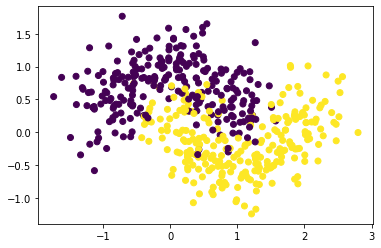

In [109]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
def diagram(knn_accuracy, my_knn_accuracy):
  plt.figure(figsize=(10, 6))
  plt.plot(np.linspace(1, 10, 10), knn_accuracy, label='sklearn knn', color = 'orange')
  plt.plot(np.linspace(1, 10, 10), my_knn_accuracy, '--', label='my knn', color = 'black')
  plt.title('Сравнение алгоритмов')
  plt.ylabel('accuracy')
  plt.xlabel('k')
  plt.legend()
  plt.show()

#Сравнение с KNeighborsClassifier из sklearn

In [125]:
def accuracy(metric = 'euclidean', weights = 'uniform'):
  knn_acc, my_knn_acc = [], []
  for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = k, metric = metric, weights = weights)
    my_knn = MyKNeighborsClassifier(n_neighbours = k, metric = metric, weights = weights)
    knn.fit(X_train, y_train)
    my_knn.fit(X_train, y_train)
    knn_acc.append(accuracy_score(y_test,knn.predict(X_test)))
    my_knn_acc.append(accuracy_score(y_test,my_knn.predict(X_test)))
  return diagram(knn_acc, my_knn_acc)

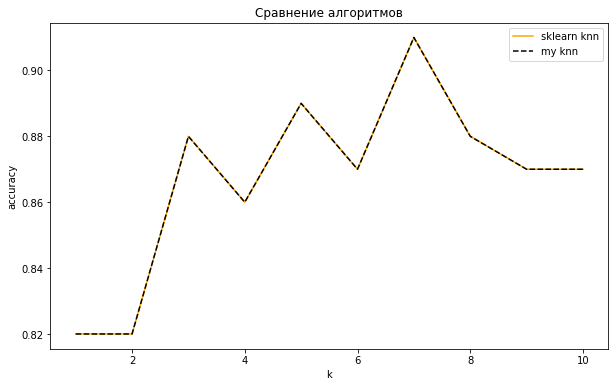

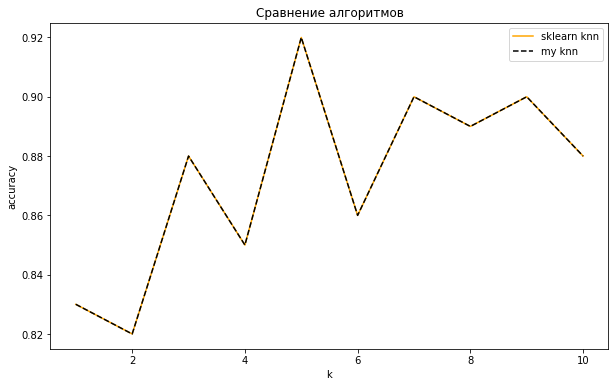

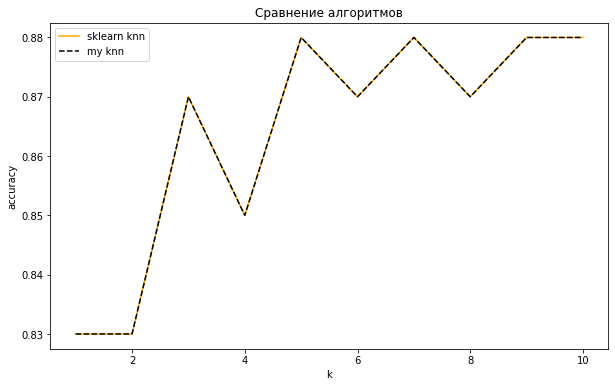

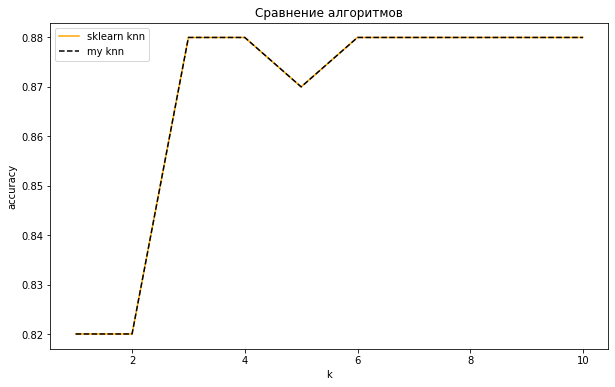

In [128]:
accuracy()
accuracy(metric = 'manhattan')
accuracy(metric = 'manhattan', weights = 'distance')
accuracy(weights = 'distance')